## Attention

When a human is exposed to a scene or a view, the eyes go through a sequential processing i.e. the eyes won't process the whole scene in one shot, but it performs a selective focusing on each frame of a scene. Selective Focusing on each object is the concept of Attention Mechanism. The mechanism has wide range of application in deep learning for tasks like image captioning, Machine Translation, Speech Recognition etc. 

Previously, we used CNN model to classify the images and with the help attection mechanism we can describe the image with much more details as we'll see in image captioning.

**From Paper - Recurrent Models of Visual Attention 2014**

One important property of human perception is that one does not tend to process a whole scene in its entirety at once. Instead humans focus attention selectively on parts of the visual space to acquire information when and where it is needed, and combine information from different fixations over time to build up an internal representation of the scene , guiding future eye movements and decision making. Focusing the computational resources on parts of a scene saves “bandwidth” as fewer “pixels” need to be processed. But it also substantially reduces the task complexity as the object of interest can be placed in the center of the fixation and irrelevant features of the visual environment (“clutter”) outside the fixated region are naturally ignored.

### Sequence to Sequence Models

A seq2seq consists of encoder and decoder network. Encoder is a RNN, which takes in sequential input and encodes the input into a context vector. On the other side, the decoder takes in the encoded input sequentially and decodes it into an output, which is again passed into RNN to get the next output.

In computer vision, we can use encoder-decoder model to generate words or captions for an input image or even to generate an image from a sequence of input words. We'll focus on the first case: generating captions for images, and you'll learn more about caption generation in the next lesson. For now know that we can input an image into a CNN (encoder) and generate a descriptive caption for that image using an LSTM (decoder).

### Why Attention when Seq2Seq is present

Everyone thinks, Why attention when we have Seq2seq model ?. As discussed above, a encoder feeds on input sequence and generates a fixed context vector. We also know that each input enters encoder and gets processed and then generates context vector for that input and as it happens sequentially. So by the end of this process, we'll be processing one last input, which will give us one final fixed context vector. Hence, the problem lies here, that irrespective of the input sequence either be large or small we get only a fixed vector, which affects the performance of the output generated. To overcome, we can generate a long context which will handle all inputs at once, but this would tend to make the short sequence to overfit the model.

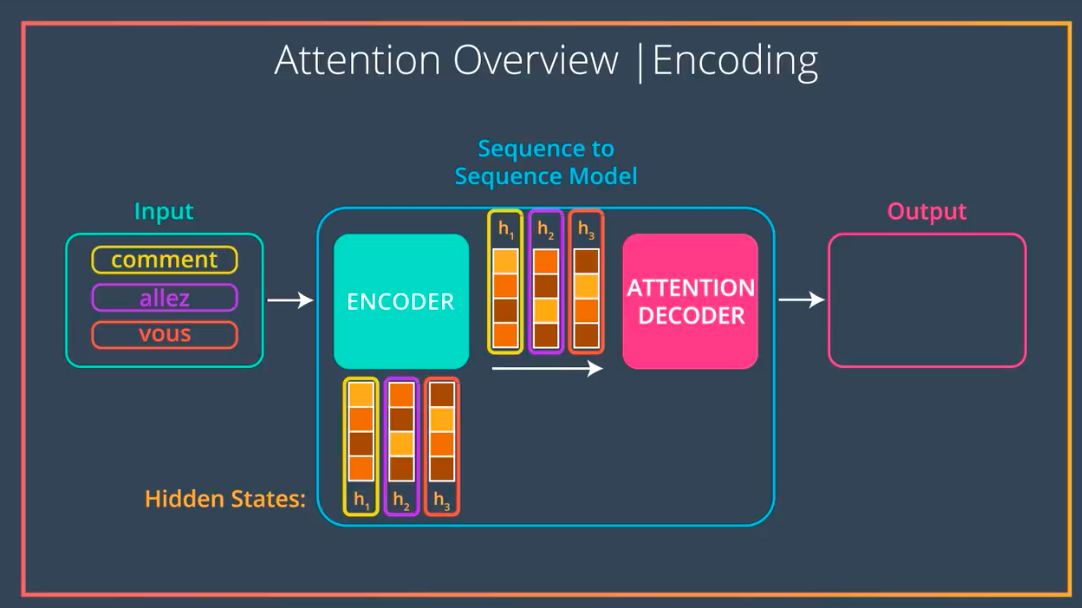

In [1]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/Screen Shot 2019-12-23 at 7.10.36 PM.png")

### Attention with Encoder

As mentioned earlier, a seq2seq model generates one context vector and uses it along with current time step input to generate next output. **Attention mechanism uses all the previously generated outputs as mentioned above (Output refers to hidden state) in the image and passed on to the decoder network.**

### Attention with Decoder

Previously in Seq2Seq, we had only one context vector to generate output from, but now we have multiple context vector and attention decoder takes in each context vector and outputs a label. These label are generated based on the trained model.

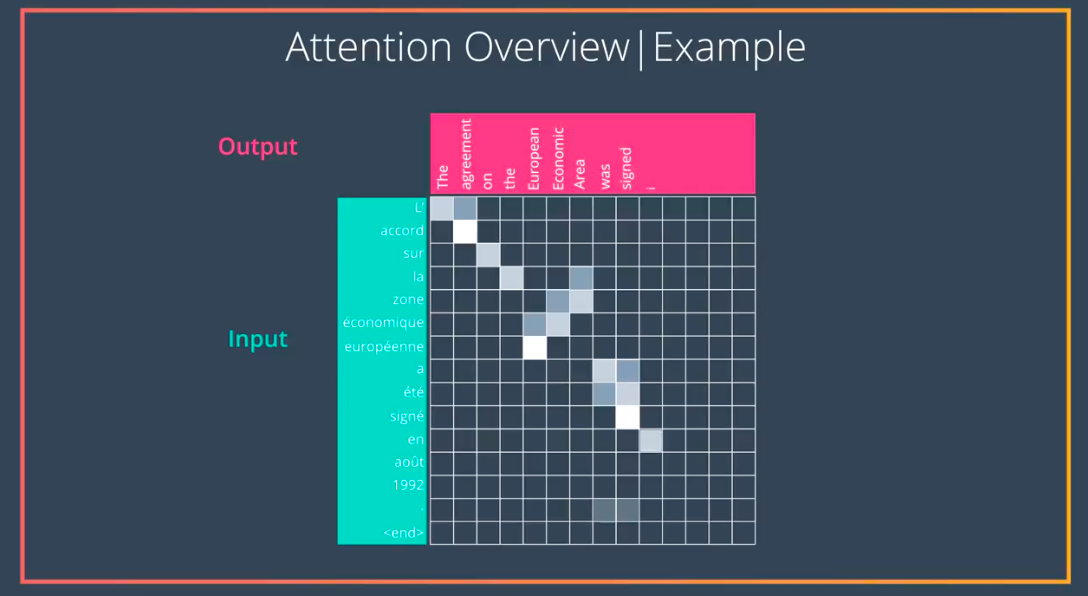

In [2]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/Screen Shot 2019-12-23 at 7.22.10 PM.png")

**Consider the above image, on the row side we have our encoder and on the top we have our decoder. Each word is passed and the context vector is generated, which is highlighted here. Brighter shade value means more importance is given to the word or neighbouring words.**

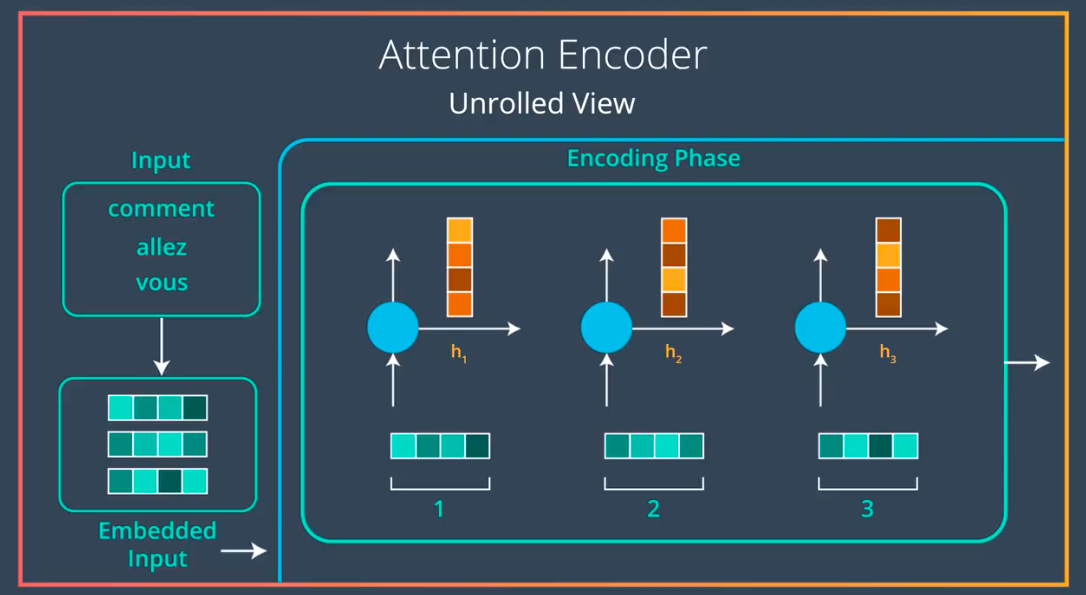

In [3]:
Image("/Users/mayurjain/Desktop/Screen Shot 2019-12-23 at 7.58.54 PM.png")

### Detailed view of Attention Encoder

The input word is turned into embedded vector, each vector is taken one at a time, processed to get hidden state like h1, h2, h3 with help RNN network (Vanilla RNN or GRU or LSTM).

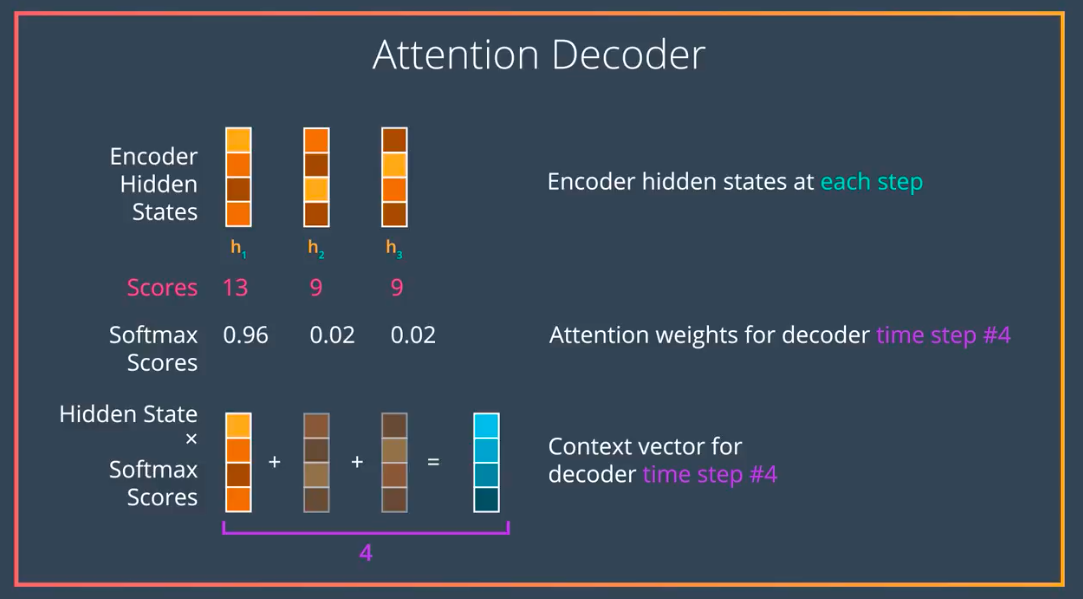

In [4]:
Image('/Users/mayurjain/Desktop/Screen Shot 2019-12-23 at 8.06.12 PM.png')

Each hidden state is goes through a scoring function to score the importance of the hidden state. After this, they are combined to form context vector. Will discuss the scoring function later.

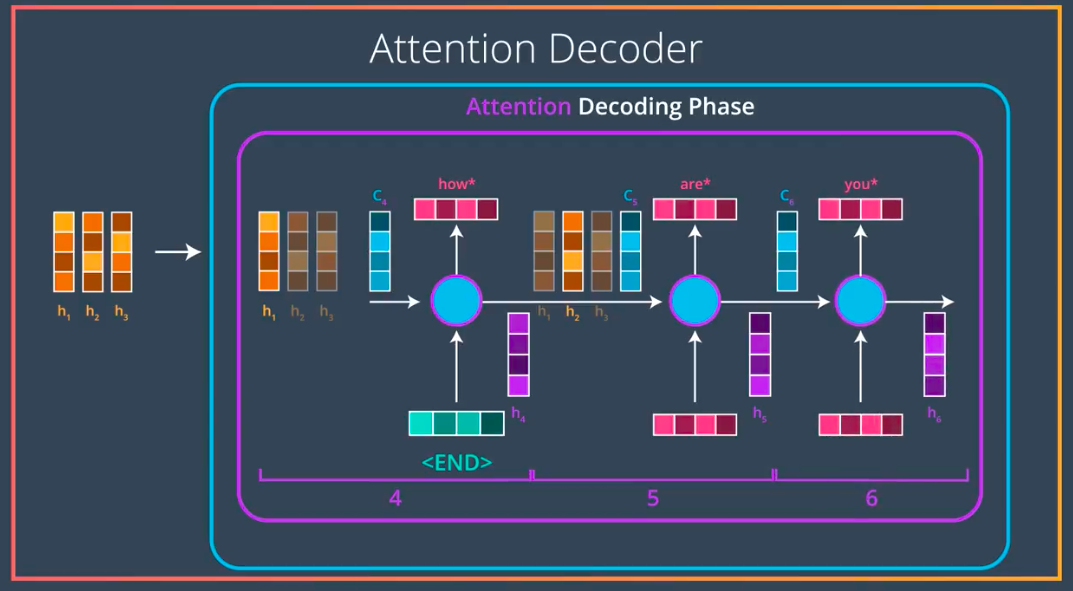

In [5]:
Image('/Users/mayurjain/Desktop/Screen Shot 2019-12-23 at 8.10.11 PM.png')

At each time step, a hidden vector is passed into the decoder RNN network, based on each hidden state and initially an embedding input "END" is used to make sure that decoder should start decoding the given hidden state. Once the decoder outputs an vector on that current time step then that output is used as input for next time step with next hidden state and it continues untill it generates a final output of translation.

**The blue vector in the image above is the combination of all three hidden unit, which is present in last second image.**

Scoring Function : https://arxiv.org/abs/1409.0473, https://arxiv.org/abs/1508.04025

### Multiplicative Attention

The scoring function, based on which we got our initial hidden state (h_t) for decoder was calculated by Multiplicative Attention function.

h_t = Initial hidden state of the decoder network generated by hidden state of the encoders.

h_s = Hidden state of the Encoder network.

There are two variants of multiplicative Attention based on task. For instance, Text summarization, the embedding size remains same as the language we work with reamins same. However, for Machine Translation, the embedding size tends to change based on the language.

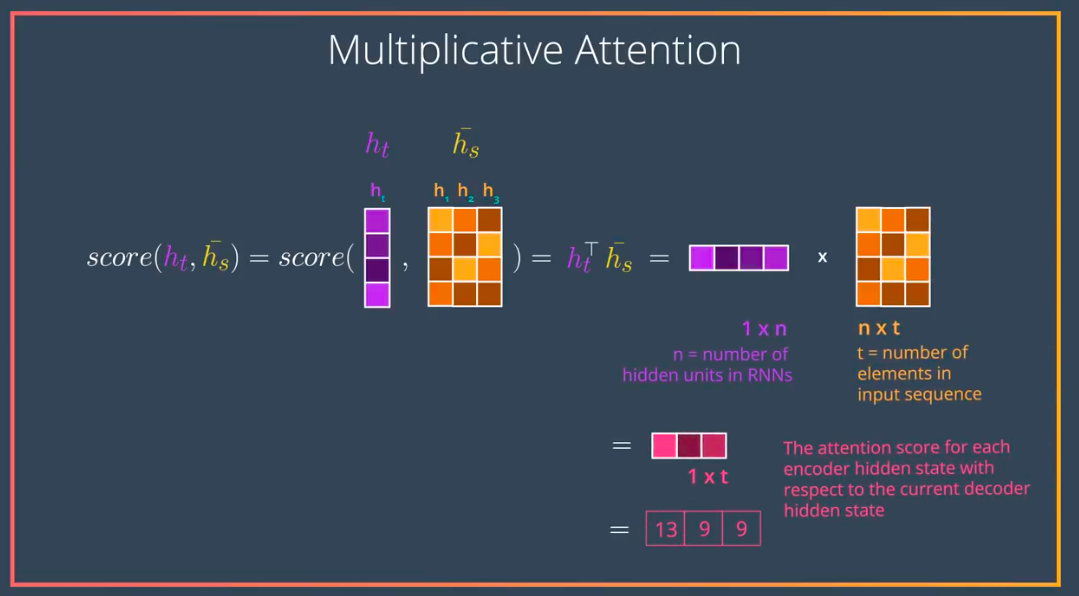

In [10]:
Image("/Users/mayurjain/Desktop/Text Summarization.png")

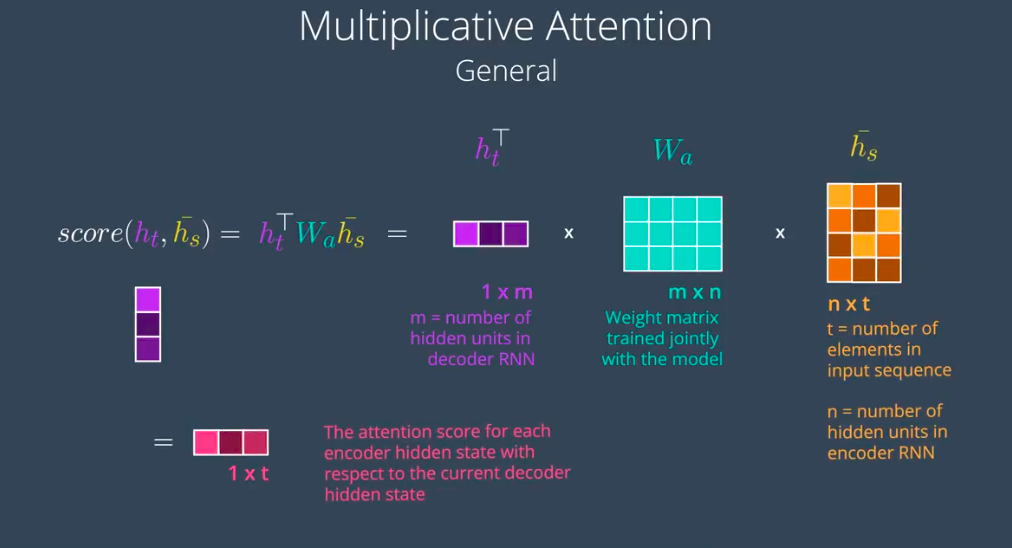

In [11]:
Image("/Users/mayurjain/Desktop/Machine Translation.png")

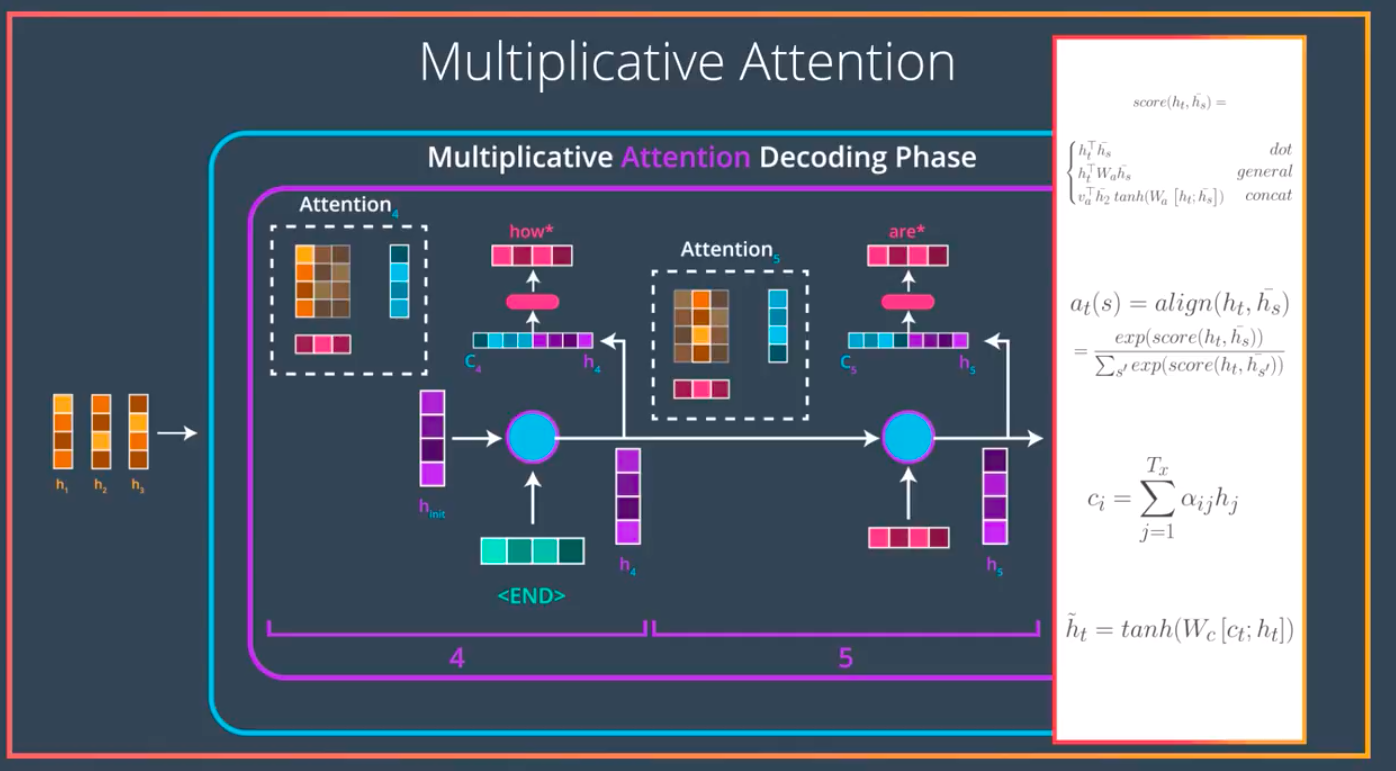

In [12]:
Image("/Users/mayurjain/Desktop/Detailed Scoring Function.png")

### Detailed Scoring Function:

**As discussed earlier, We get the h_init from hidden state of the encoder network. Then we pass in embedding word "END" along with h_init to generate hidden state decoder of 4th time step h_4. Once we find h_4, we perform scoring as mentioned on the right side, either we do a dot product or general operation or concat. We get our score which is mentioned as vector in pink color. After this we perform softmax of the score and then do a operation between hidden state of the encoder with Scoring vector (Pink color) to get the context vector (Blue Color). Then concat the hidden state h_4 with context vector (C_4) which is further moved to fully connected layer with tanh to gives the output.
The above operation is repeated as the words are generated.**

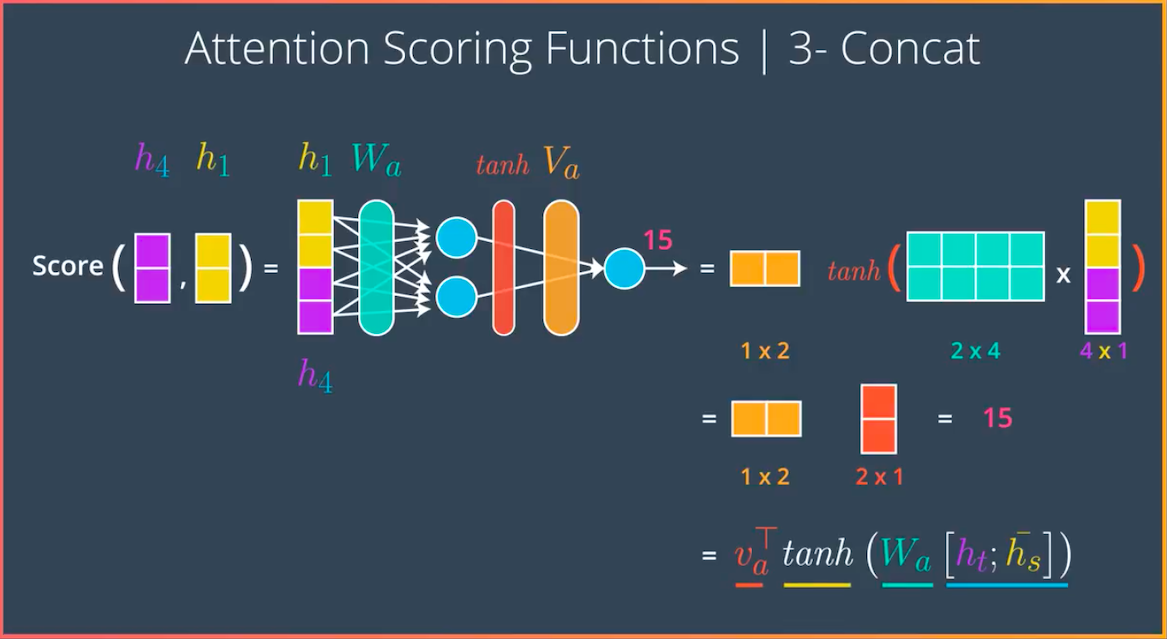

In [14]:
Image('/Users/mayurjain/Desktop/Concat Scoring Function.png')

The above scoring method is straight forward, where we perform vector concatenation h_4 and h_1, then its passed on to fully connected layer and tanh function. We learn weight matrix W_a and V_a. Here, h_1 represent just one hidden state of the encoder.

#### Super interesting computer vision applications using attention:

Show, Attend and Tell: Neural Image Caption Generation with Visual Attention: https://arxiv.org/pdf/1502.03044.pdf 

Bottom-Up and Top-Down Attention for Image Captioning and Visual Question Answering: https://arxiv.org/pdf/1707.07998.pdf

Video Paragraph Captioning Using Hierarchical Recurrent Neural Networks: https://www.cv-foundation.org/openaccess/content_cvpr_2016/app/S19-04.pdf

Every Moment Counts: Dense Detailed Labeling of Actions in Complex Videos: https://arxiv.org/pdf/1507.05738.pdf

Tips and Tricks for Visual Question Answering: Learnings from the 2017 Challenge: https://arxiv.org/pdf/1708.02711.pdf

Visual Question Answering: A Survey of Methods and Datasets: https://arxiv.org/pdf/1607.05910.pdf

### Major breakthrough from Attention

**Attention is all you need**: https://arxiv.org/abs/1706.03762, https://www.youtube.com/watch?v=rBCqOTEfxvg

A model named **Transformer** is built on the premise of Attention but with no RNN. It vastly improves on the machine translation task and also needs less time to train the network. Similar to Seq2Seq model, the transformer model uses an encoder and decoder network, while previously it was using RNN in its encoder and decoder network. Here, the **transformer uses a feedforward network and self-attention mechanism.**

Parallel processing was not possible in RNN based Attention network, thats why transformer model leverages the parallel processing, which makes time efficient. Unlike Attention based RNN, the transformer model takes all the input in one shot and generates the output.

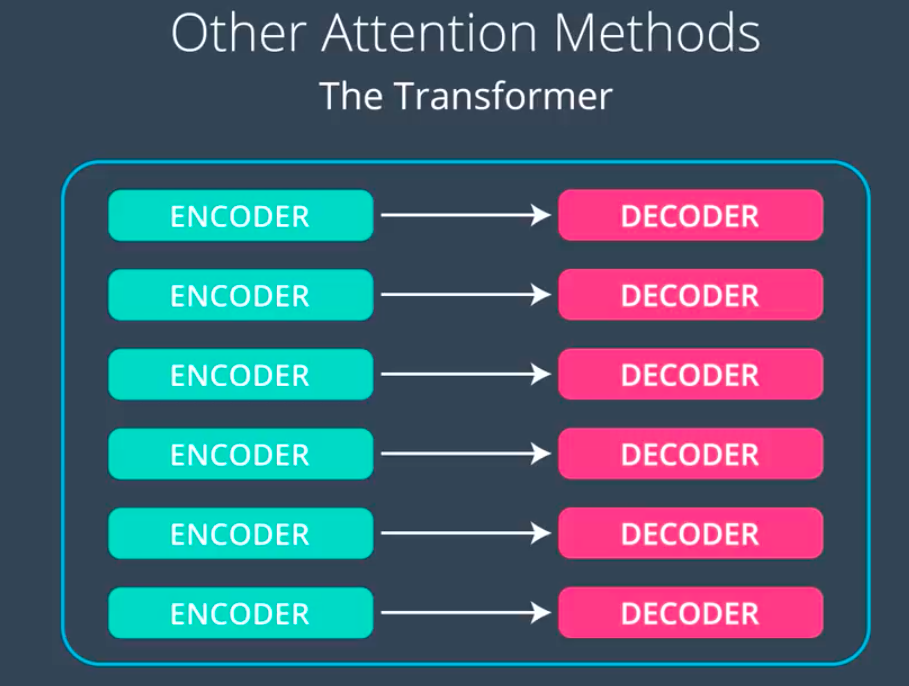

In [15]:
Image('/Users/mayurjain/Desktop/Transformer.png')

### Structure of Transformer

**The model has stack of 6 identical encoder and decoder modules, each with its own attention mechanism.**

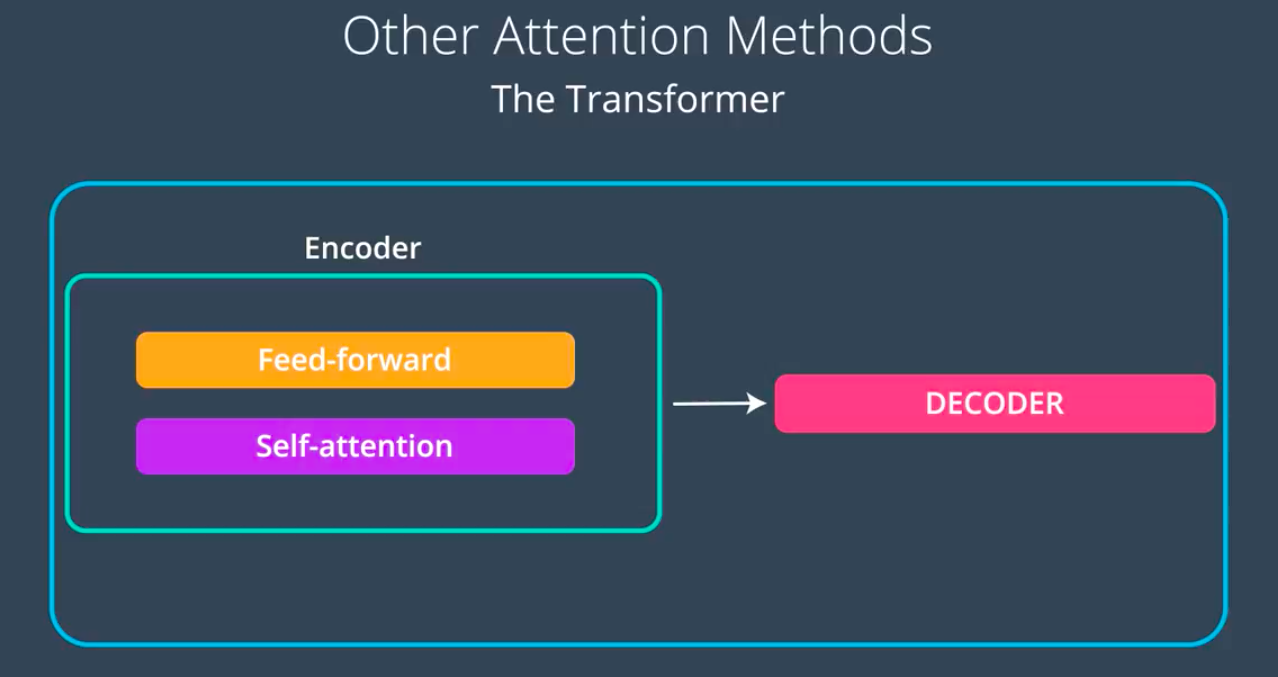

In [16]:
Image('/Users/mayurjain/Desktop/Encoder.png')

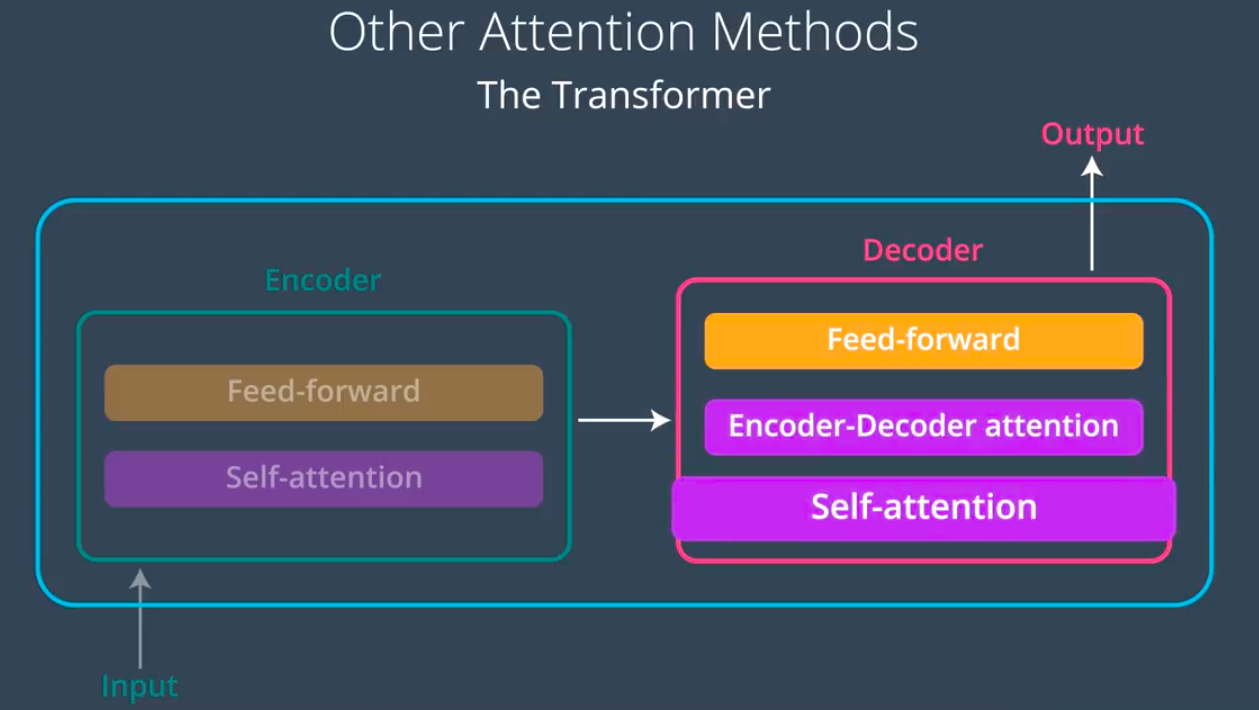

In [17]:
Image("/Users/mayurjain/Desktop/Decoder.png")

In previous mechanism of attention with RNN, the model performs attention on decoder network of the RNN. While in Transformer, their is attention mechanism in both encoder and decoder. In transformer, the encoder not only looks at the previous words but also on words that appear in later in the input sequence.
### Encoder

**The Attention components helps in comprehending its inputs by focusing on other parts of the input sequence that are relevant to each input element it processes.**

### Decoder

**Encoder-Decoder Attention allows to focus on the relevant part of the inputs and while self attention pays attention to only the previous output of the decoder.**

**Transformer Model**: http://jalammar.github.io/illustrated-transformer/ , https://www.analyticsvidhya.com/blog/2019/06/understanding-transformers-nlp-state-of-the-art-models/ ,
https://towardsdatascience.com/transformers-141e32e69591

